In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

# import os
# os.chdir('/content/drive/MyDrive/根據區域微氣候資料預測發電量競賽')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# 讀取資料
df = pd.read_csv('L6_Train.csv')
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,6,2024-05-14 16:50:07.000,0.00,1006.95,25.15,63.45,5500.83,6.29
1,6,2024-05-14 16:51:04.000,0.61,1007.46,25.52,63.11,5389.17,6.17
2,6,2024-05-14 16:52:04.000,0.00,1007.75,25.73,63.25,5675.83,7.28
3,6,2024-05-14 16:53:04.000,0.00,1007.83,25.73,63.06,6033.33,8.43
4,6,2024-05-14 16:54:04.000,0.00,1007.77,25.74,62.96,6390.00,9.20
...,...,...,...,...,...,...,...,...
52554,6,2024-07-24 17:38:07.000,5.40,960.71,25.57,100.00,139.17,0.01
52555,6,2024-07-24 17:39:07.000,3.75,960.97,25.55,100.00,121.67,0.00
52556,6,2024-07-24 17:40:07.000,4.27,961.31,25.53,100.00,110.83,0.00
52557,6,2024-07-24 17:41:07.000,3.57,961.10,25.55,100.00,99.17,0.00


In [5]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,52559.0,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000
mean,6.0,0.732350,1002.924988,38.264051,49.262008,28868.053252,420.105436
std,0.0,0.985913,4.713667,9.219711,25.878658,28138.804761,591.631728
min,6.0,0.000000,958.190000,18.900000,12.050000,20.000000,0.000000
25%,6.0,0.000000,1001.220000,30.260000,25.690000,4979.170000,6.080000
50%,6.0,0.350000,1003.390000,37.360000,44.180000,18917.500000,88.630000
75%,6.0,1.050000,1005.250000,46.750000,69.045000,50258.590000,632.130000
max,6.0,17.250000,1013.550000,57.580000,100.000000,117758.200000,2434.530000


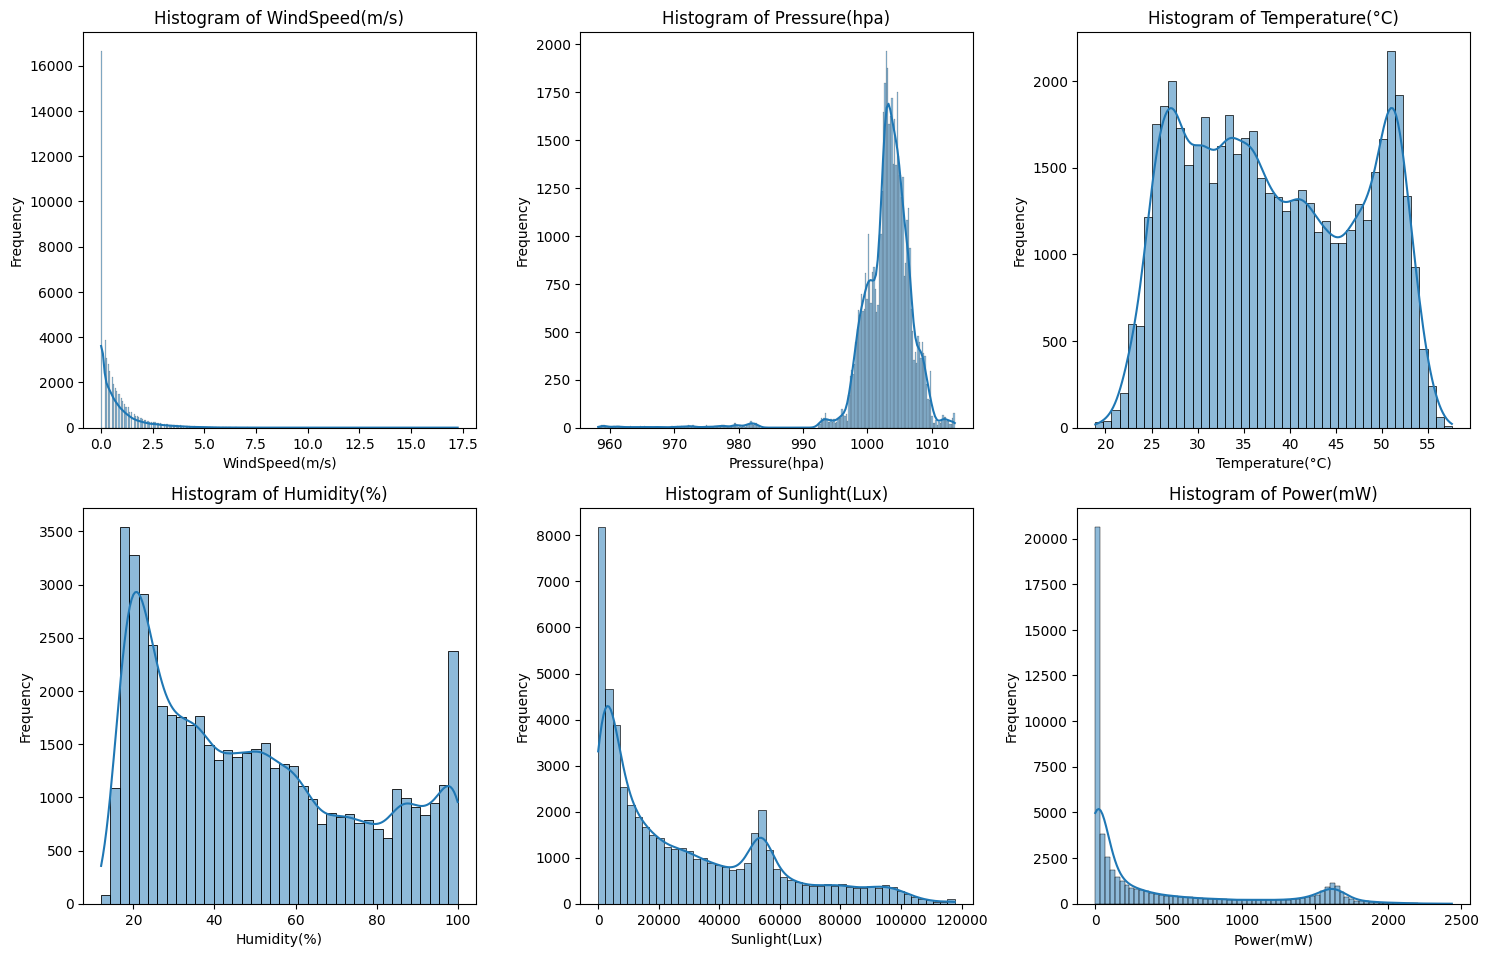

In [ ]:
# 繪製直方圖
use_columns = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# 篩選Sunlight(Lux)最大值
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] == max_sunlight]
df_filtered

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
421,6,2024-05-15 10:07:06.000,0.52,1009.80,38.27,29.81,117758.2,1648.08
424,6,2024-05-15 10:10:06.000,2.53,1009.60,38.11,29.34,117758.2,1668.19
434,6,2024-05-15 10:20:06.000,1.83,1009.60,36.55,32.24,117758.2,1803.56
478,6,2024-05-15 11:04:06.000,0.96,1009.48,37.88,30.60,117758.2,2030.46
2040,6,2024-05-17 09:33:23.000,0.17,1008.80,49.94,13.45,117758.2,1765.40
...,...,...,...,...,...,...,...,...
26849,6,2024-06-21 10:20:54.000,0.35,1001.17,56.39,16.37,117758.2,1643.80
26850,6,2024-06-21 10:21:54.000,0.17,1001.37,56.65,15.61,117758.2,1667.85
26851,6,2024-06-21 10:22:54.000,0.00,1001.40,56.93,16.18,117758.2,1692.98
26852,6,2024-06-21 10:23:54.000,0.00,1001.35,57.20,16.05,117758.2,1720.90


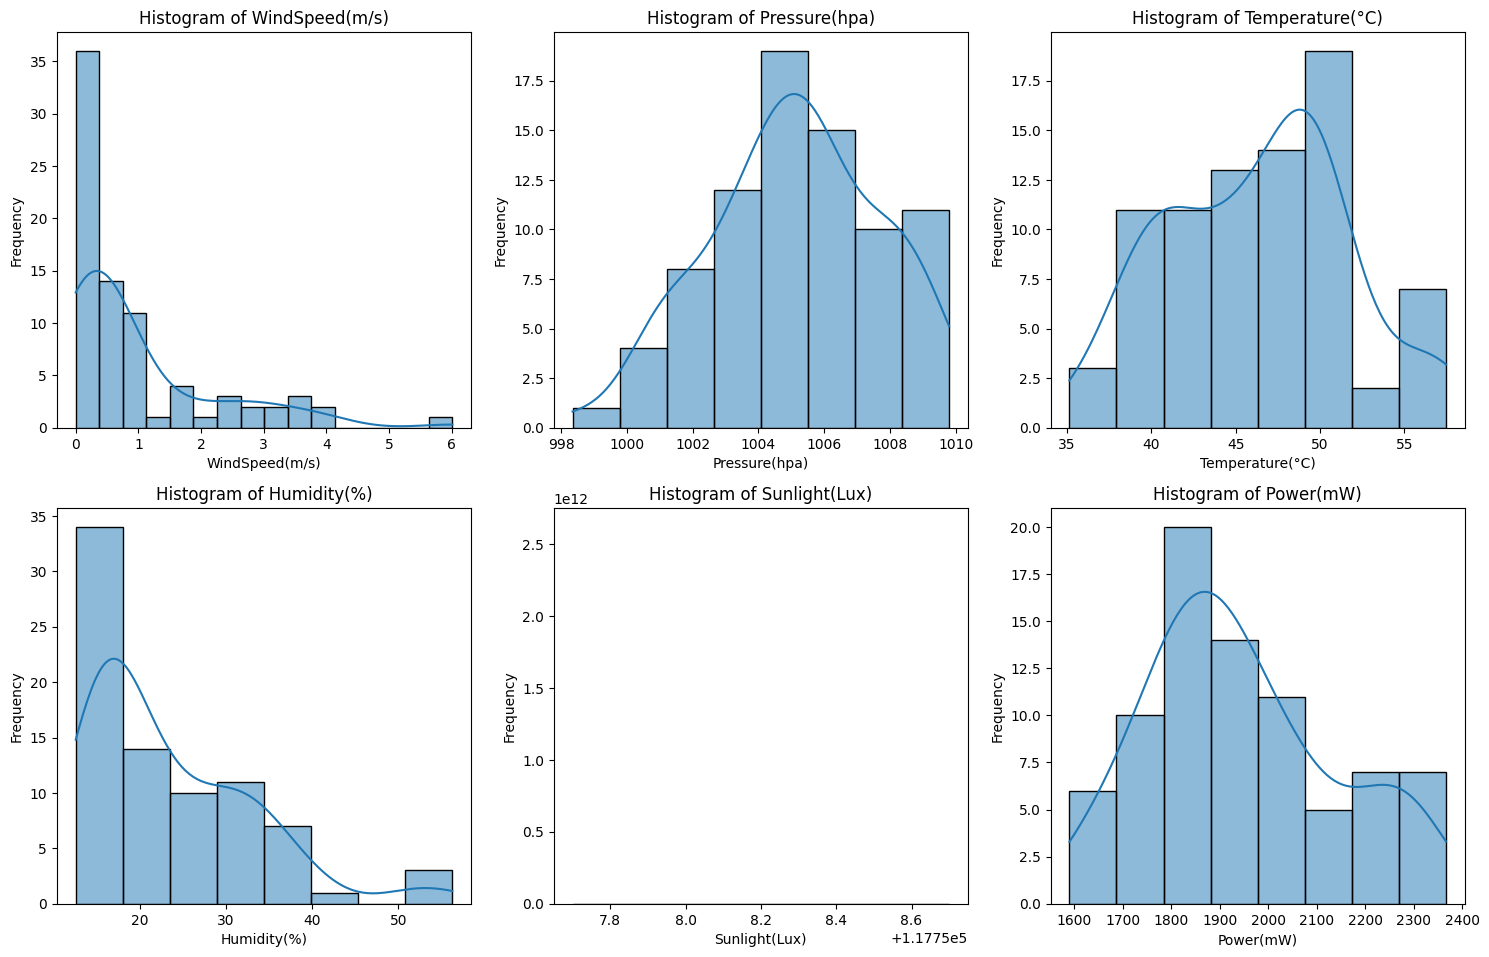

In [ ]:
# 繪製直方圖
use_columns = df_filtered[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [10]:
# 利用迴歸分析先分析Sunlight(Lux)數值尚未達到最大值前的Sunlight(Lux)對Power(mW)的比率，回推Power(mW)所產生的Sunlight(Lux)
from sklearn.linear_model import LinearRegression

# 步驟 1：篩選資料（過濾 Sunlight(Lux) 未達到最大值的數據）
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] < max_sunlight]

# 步驟 2：設定自變數與因變數
X = df_filtered[['Sunlight(Lux)']]  # 自變數 (Sunlight)
y = df_filtered['Power(mW)']        # 因變數 (Power)

# 步驟 3：建立線性迴歸模型並進行訓練
model = LinearRegression()
model.fit(X, y)

# 顯示迴歸係數和截距
slope = model.coef_[0]
intercept = model.intercept_

print(f'回歸方程：Power(mW) = {slope:.4f} * Sunlight(Lux) + {intercept:.4f}')

回歸方程：Power(mW) = 0.0181 * Sunlight(Lux) + -101.1934


In [11]:
def calculate_sunlight(power):
    sunlight = (power - intercept) / slope
    return sunlight
slope = 0.0181
intercept = -101.1934

# 複製df_filtered
df_filtered = df[df['Sunlight(Lux)'] == df['Sunlight(Lux)'].max()].copy()

# 使用 .loc 指定修改列中的欄位，回推Sunlight(Lux)
df_filtered['Recalculated Sunlight(Lux)'] = df_filtered['Power(mW)'].apply(calculate_sunlight)

# 更新原始df中的Sunlight(Lux)欄位
df.loc[df_filtered.index, 'Sunlight(Lux)'] = df_filtered['Recalculated Sunlight(Lux)']
# df

In [12]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,52559.0,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000
mean,6.0,0.732350,1002.924988,38.264051,49.262008,28860.693050,420.105436
std,0.0,0.985913,4.713667,9.219711,25.878658,28119.187532,591.631728
min,6.0,0.000000,958.190000,18.900000,12.050000,20.000000,0.000000
25%,6.0,0.000000,1001.220000,30.260000,25.690000,4979.170000,6.080000
50%,6.0,0.350000,1003.390000,37.360000,44.180000,18917.500000,88.630000
75%,6.0,1.050000,1005.250000,46.750000,69.045000,50258.590000,632.130000
max,6.0,17.250000,1013.550000,57.580000,100.000000,136364.276243,2434.530000


In [13]:
df['LocationCode'] = df['LocationCode'].apply(lambda x: f'{x:02d}')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# 提取日期時間的相關特徵
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df['Weekday'] = df['DateTime'].dt.weekday

df['DateTime'] = df['Year'].astype(str).str.zfill(4) + \
                    df['Month'].astype(str).str.zfill(2) + \
                    df['Day'].astype(str).str.zfill(2) + \
                    df['Hour'].astype(str).str.zfill(2) + \
                    df['Minute'].astype(str).str.zfill(2) + \
                    df['Second'].astype(str).str.zfill(2)
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second' ,'Weekday'], axis=1)
df['DateTime'] = df['DateTime'].astype('int64')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M%S')

# 每10筆資料合併成一筆並計算平均值
# 使用 `groupby` 和 `agg` 方法
df = df.groupby(df.index // 10).agg({
    'LocationCode': 'first',  # 取第一筆的 LocationCode
    'DateTime': 'first',  # 取第一筆的 DateTime
    'WindSpeed(m/s)': 'mean',
    'Pressure(hpa)': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Sunlight(Lux)': 'mean',
    'Power(mW)': 'mean',
}).reset_index(drop=True)

df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']] = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].round(2)

# 將 DateTime 列轉換回原格式
df['DateTime'] = df['DateTime'].dt.strftime('%Y%m%d%H%M%S')

In [14]:
# 將 LocationCode 轉換為字符串
df['LocationCode'] = df['LocationCode'].astype(str)

# 修改 DateTime 的最後兩位數為 LocationCode 的值
df['DateTime'] = df['DateTime'].str.slice(0, -2) + df['LocationCode']

df = df.rename(columns={'DateTime': 'Serial'}) #　序號
df['Serial'] = df['Serial'].astype('int64')
df = df.drop(['LocationCode'], axis=1)
df

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,20240514165006,0.22,1007.62,25.60,63.30,5998.00,8.47
1,20240514170006,0.45,1007.77,25.36,64.63,4886.33,5.63
2,20240514171006,0.54,1008.00,24.96,67.08,2893.83,1.89
3,20240514172006,0.37,1008.01,24.64,68.68,1971.33,0.93
4,20240514173006,0.45,1008.09,24.60,69.75,2304.83,1.32
...,...,...,...,...,...,...,...
5251,20240724165406,1.84,958.99,25.79,100.00,349.58,0.03
5252,20240724170406,3.45,959.28,25.83,100.00,291.42,0.02
5253,20240724171406,6.39,960.44,25.74,100.00,219.83,0.01
5254,20240724172406,9.97,961.90,25.65,100.00,141.00,0.01


# HEATMAP

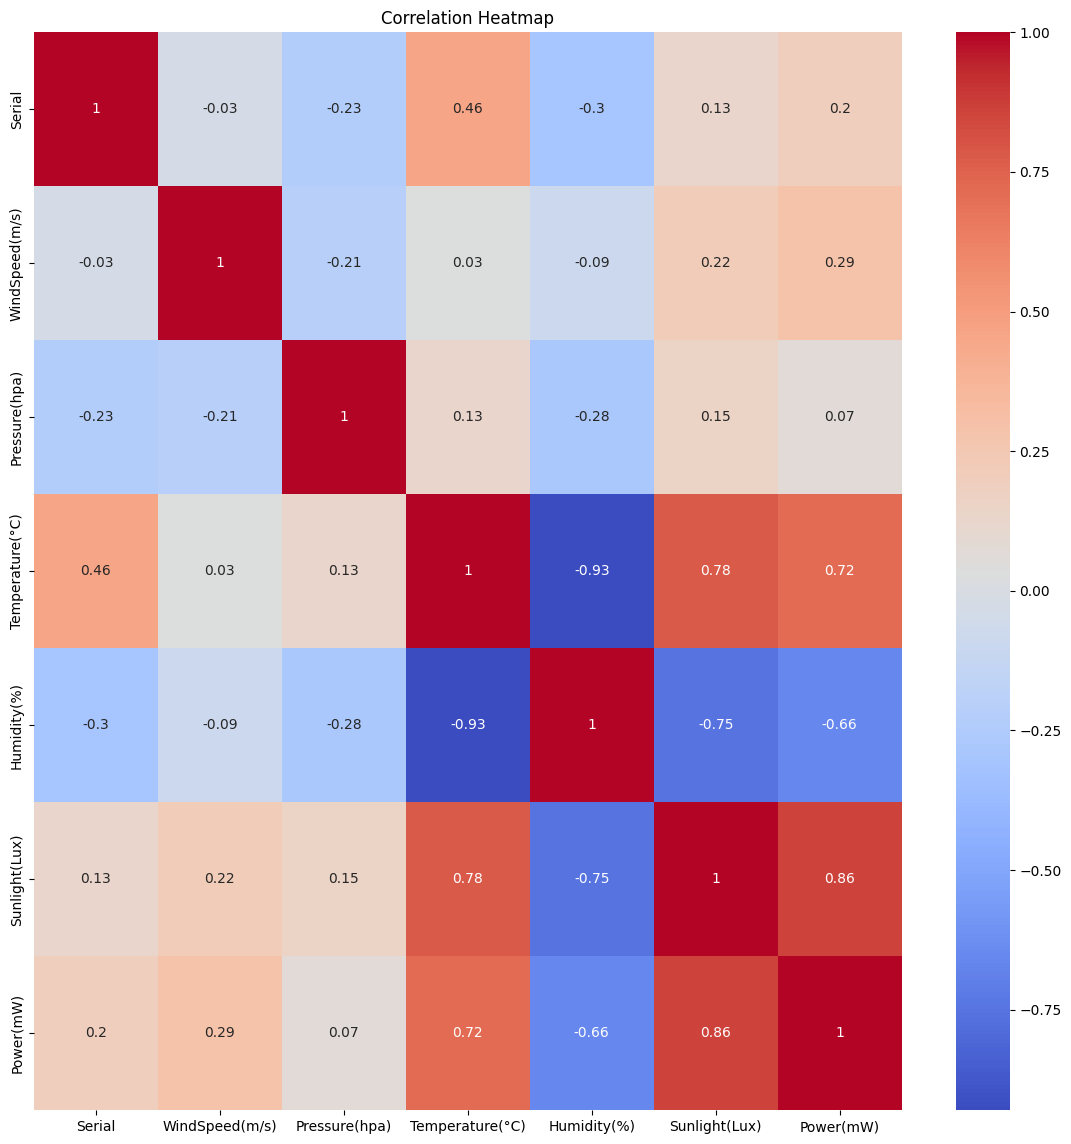

In [ ]:
# 繪製熱力圖
plt.figure(figsize=(14, 14))

corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 相關性絕對值
correlation = df.corr().abs()
top_10_features = correlation['Power(mW)'].sort_values(ascending=False).head(11)
top_10_features

Power(mW)          1.000000
Sunlight(Lux)      0.858316
Temperature(°C)    0.722898
Humidity(%)        0.661296
WindSpeed(m/s)     0.294203
Serial             0.202608
Pressure(hpa)      0.074392
Name: Power(mW), dtype: float64

In [17]:
df.to_csv('L6_Train_Revise.csv', index=False)